In [75]:
import PIL
import numpy as np
import pandas as pd
from IPython.display import display

#import torch
#import keras
#import tensorflow as tf

#### Environment

In [17]:
import sys
print(sys.version)
print('-'*50)
!python --version

2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]
--------------------------------------------------
Python 2.7.15 :: Anaconda, Inc.


In [7]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17139076987035529143
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3568832915793893966
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13814272587040288047
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16800981104426109821
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12287593063186359642
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 32040950170
locality {
  bus_id: 1
  links {
  }
}
incarnation: 388718977610499509
physical_device_desc: "device: 0, name: Tesla V100-SXM2-32GB, pc

# TEST1. Leaf Disease Classification

- data upload
- CNN modeling

## 1) Data
- load
- classify
- split

In [20]:
cd data

/home/ubuntu/CUAI_2021/Jaehyun Jeong/data


In [32]:
!ls

dataset.zip  inputImagesCNN  originalImages  originalImages.zip  ox.png


In [34]:
#!unzip -qq './dataset.zip' -d './dataset'

In [36]:
import os

original_dataset_dir = './dataset'
classes_list = os.listdir(original_dataset_dir)

base_dir = './splitted'
os.mkdir(base_dir)

In [37]:
import shutil

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

for cls in classes_list:
  os.mkdir(os.path.join(train_dir, cls))
  os.mkdir(os.path.join(val_dir, cls))
  os.mkdir(os.path.join(test_dir, cls))

In [46]:
classes_list[:10]

['Pepper,_bell___healthy',
 'Grape___Esca_(Black_Measles)',
 'Pepper,_bell___Bacterial_spot',
 'Strawberry___healthy',
 'Grape___Black_rot',
 'Corn___Common_rust',
 'Apple___Apple_scab',
 'Potato___healthy',
 'Potato___Late_blight',
 'Cherry___healthy']

In [51]:
original_dataset_dir

'./dataset'

In [49]:
os.path.join(original_dataset_dir, cls)

'./dataset/Pepper,_bell___healthy'

In [55]:
fnames = os.listdir(os.path.join(original_dataset_dir, cls))
fnames[:10]

['image (1213).JPG',
 'image (1298).JPG',
 'image (597).JPG',
 'image (968).JPG',
 'image (892).JPG',
 'image (410).JPG',
 'image (1308).JPG',
 'image (1239).JPG',
 'image (1016).JPG',
 'image (1274).JPG']

In [60]:
int(math.floor(len(fnames)*.6))

886

In [61]:
import math

for cls in classes_list:
  path = os.path.join(original_dataset_dir, cls)
  fnames = os.listdir(path)

  train_size = int(math.floor(len(fnames)*0.6))
  val_size = int(math.floor(len(fnames)*0.2))
  test_size = int(math.floor(len(fnames)*0.2))

# train data
  train_fnames = fnames[:train_size]
  print("Train size(",cls,"):" , len(train_fnames))
  for fname in train_fnames:
    scr = os.path.join(path, fname)
    dst = os.path.join(os.path.join(train_dir, cls), fname)
    shutil.copyfile(scr, dst)

# val data
  val_fnames = fnames[train_size:(val_size + train_size)]
  print("Val size(",cls,"):" , {len(val_fnames)})
  for fname in val_fnames:
    scr = os.path.join(path, fname)
    dst = os.path.join(os.path.join(val_dir, cls), fname)
    shutil.copyfile(scr, dst)

# test data
  test_fnames = fnames[(train_size+val_size):(val_size + train_size + test_size)]
  print("Test size(",cls,"):" , {len(test_fnames)})
  for fname in test_fnames:
    scr = os.path.join(path, fname)
    dst = os.path.join(os.path.join(test_dir, cls), fname)
    shutil.copyfile(scr, dst)

('Train size(', 'Pepper,_bell___healthy', '):', 886)
('Val size(', 'Pepper,_bell___healthy', '):', set([295]))
('Test size(', 'Pepper,_bell___healthy', '):', set([295]))
('Train size(', 'Grape___Esca_(Black_Measles)', '):', 829)
('Val size(', 'Grape___Esca_(Black_Measles)', '):', set([276]))
('Test size(', 'Grape___Esca_(Black_Measles)', '):', set([276]))
('Train size(', 'Pepper,_bell___Bacterial_spot', '):', 598)
('Val size(', 'Pepper,_bell___Bacterial_spot', '):', set([199]))
('Test size(', 'Pepper,_bell___Bacterial_spot', '):', set([199]))
('Train size(', 'Strawberry___healthy', '):', 273)
('Val size(', 'Strawberry___healthy', '):', set([91]))
('Test size(', 'Strawberry___healthy', '):', set([91]))
('Train size(', 'Grape___Black_rot', '):', 708)
('Val size(', 'Grape___Black_rot', '):', set([236]))
('Test size(', 'Grape___Black_rot', '):', set([236]))
('Train size(', 'Corn___Common_rust', '):', 715)
('Val size(', 'Corn___Common_rust', '):', set([238]))
('Test size(', 'Corn___Common_r

## 2) Modeling
- CNN modeling
- tranfer learning

### 2-1. CNN

In [66]:
import torch
import os

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print(device)
batch_size=256
epoch=30

cuda


In [96]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform_base = transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])
train_dataset = ImageFolder(root='./splitted/train', transform=transform_base)
val_dataset = ImageFolder(root='./splitted/val', transform=transform_base)
test_dataset = ImageFolder(root='./splitted/test', transform=transform_base) 

In [97]:
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [69]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):

      super(Net, self).__init__()

      self.conv1 = nn.Conv2d(3,32,3,padding=1)
      self.pool = nn.MaxPool2d(2,2)
      self.conv2 = nn.Conv2d(32,64,3,padding=1)
      self.conv3 = nn.Conv2d(64,64,3,padding=1)

      self.fc1 = nn.Linear(4096,512)
      self.fc2 = nn.Linear(512,33)

    def forward(self, x):

      x = self.conv1(x)
      x = F.relu(x)
      x = self.pool(x)
      x = F.dropout(x, p=.25, training=self.training)

      x = self.conv2(x)
      x = F.relu(x)
      x = self.pool(x)
      x = F.dropout(x, p=.25, training=self.training)

      x = self.conv3(x)
      x = F.relu(x)
      x = self.pool(x)
      x = F.dropout(x, p=.25, training=self.training)

      x = x.view(-1, 4096)
      x = self.fc1(x)
      x = F.relu(x)
      x = F.dropout(x, p=.5, training=self.training)
      x = self.fc2(x)

      return F.log_softmax(x, dim=1)

In [70]:
model_base = Net().to(device)
optimizer = optim.Adam(model_base.parameters(), lr=.001)

In [71]:
def train(model, train_loader, optimizer):
  model.train()
  for batch_size, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()

def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)

      test_loss += F.cross_entropy(output, target, reduction='sum').item()

      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100.*correct / len(test_loader.dataset)
    
  return test_loss, test_accuracy

In [72]:
import time
import copy

def train_baseline(model, train_loader, val_loader, optimizer, num_epochs=30):
  best_acc = .0
  best_model_wts = copy.deepcopy(model.state_dict())

  for epoch in range(1, num_epochs+1):
    since = time.time()
    train(model, train_loader, optimizer)
    train_loss, train_acc = evaluate(model, train_loader)
    val_loss, val_acc = evaluate(model, val_loader)

    if val_acc > best_acc:
      best_acc = val_acc
      best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('-------------------- epoch {} ----------------------'.format(epoch))
    print('train Loss: {:.4f}. Accuracy:{:.2f}%'.format(train_loss, train_acc))
    print('val Loss: {:.4f}. Accuracy:{:.2f}%'.format(val_loss, val_acc))
    print('completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

  model.load_state_dict(best_model_wts)
  return model

In [73]:
base = train_baseline(model_base, train_loader, val_loader, optimizer, epoch)

-------------------- epoch 1 ----------------------
train Loss: 1.5028. Accuracy:57.67%
val Loss: 1.5182. Accuracy:57.58%
completed in 0m 30s
-------------------- epoch 2 ----------------------
train Loss: 0.9266. Accuracy:72.32%
val Loss: 0.9511. Accuracy:70.86%
completed in 0m 30s
-------------------- epoch 3 ----------------------
train Loss: 0.7502. Accuracy:77.97%
val Loss: 0.7904. Accuracy:76.17%
completed in 0m 30s
-------------------- epoch 4 ----------------------
train Loss: 0.6111. Accuracy:80.72%
val Loss: 0.6678. Accuracy:78.67%
completed in 0m 30s
-------------------- epoch 5 ----------------------
train Loss: 0.4868. Accuracy:85.46%
val Loss: 0.5490. Accuracy:82.89%
completed in 0m 30s
-------------------- epoch 6 ----------------------
train Loss: 0.3854. Accuracy:88.89%
val Loss: 0.4516. Accuracy:85.64%
completed in 0m 30s
-------------------- epoch 7 ----------------------
train Loss: 0.3745. Accuracy:88.24%
val Loss: 0.4520. Accuracy:84.92%
completed in 0m 30s
------

In [74]:
# model save
torch.save(base, 'baseline.pt')

In [77]:
base.cuda

<bound method Net.cuda of Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=33, bias=True)
)>

#### load model and evaluate

In [79]:
# load model
load_model = torch.load('../baseline.pt')
load_model

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=33, bias=True)
)

In [129]:
print('[Train dataset]', train_dataset)
print('-'*100)
print('[Validation dataset]',val_dataset)   
print('-'*100)
print('[Test dataset]',test_dataset)

('[Train dataset]', Dataset ImageFolder
    Number of datapoints: 23989
    Root location: ./splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           ))
----------------------------------------------------------------------------------------------------
('[Validation dataset]', Dataset ImageFolder
    Number of datapoints: 7989
    Root location: ./splitted/val
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           ))
----------------------------------------------------------------------------------------------------
('[Test dataset]', Dataset ImageFolder
    Number of datapoints: 7989
    Root location: ./splitted/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           ))


In [130]:
train_loss, train_acc = evaluate(load_model, train_loader)
val_loss, val_acc = evaluate(load_model, val_loader)
test_loss, test_acc = evaluate(load_model, test_loader)

In [131]:
print('Train Loss: {}, Train Accuracy: {}'.format(train_loss, train_acc))
print('Validation Loss: {}, Valdiation Accuracy: {}'.format(val_loss, val_acc))
print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

Train Loss: 0.0590433206757, Train Accuracy: 98.6952353162
Validation Loss: 0.207494808058, Valdiation Accuracy: 93.3783952935
Test Loss: 0.203066439574, Test Accuracy: 93.7288772062


In [ ]:
{Train Loss: train_loss, Train Accuracy: train_acc}
print('Validation Loss: {}, Valdiation Accuracy: {}'.format(val_loss, val_acc))
print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

In [142]:
pd.DataFrame([[train_loss, train_acc], [val_loss, val_acc], [test_loss, test_acc]],
            columns=['Loss', 'Accuracy'],
            index=['Train', 'Validation', 'Test'])

,Loss,Accuracy
Train,0.059043,98.695235
Validation,0.207495,93.378395
Test,0.203066,93.728877


### 2-2. Transfer Learning
- ResNet50

In [143]:
data_transforms = {
    'train' : transforms.Compose([transforms.Resize([64,64]),
                                 transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip(),
                                 transforms.RandomCrop(52), transforms.ToTensor(),
                                 transforms.Normalize([.485, .456, .406], [.229, .224, .225])]),
    
    'val' : transforms.Compose([transforms.Resize([64,64]),
                                 transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip(),
                                 transforms.RandomCrop(52), transforms.ToTensor(),
                                 transforms.Normalize([.485, .456, .406], [.229, .224, .225])])
}

In [146]:
BATCH_SIZE=256
data_dir = './splitted'
image_datasets = {x: ImageFolder(root=os.path.join(data_dir, x),
                                transform=data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_name = image_datasets['train'].classes

In [ ]:
from torchvision import models

resnet = models.resnet50(pretrained=True)
num_ftrs = resnet

# TEST2. Recommending Similar Images
- Transfer Learning(ResNet18)
- Cosine Similarity

In [12]:
cd data

/home/ubuntu/CUAI_2021/Jaehyun Jeong/data


In [13]:
!ls

dataset.zip  originalImages.zip  ox.png


In [15]:
# !unzip -qq './originalImages.zip' -d './originalImages'

## 1) Image Rescaling

In [3]:
import os
from PIL import Image
from torchvision import transforms

# needed input dimensions for the CNN
inputDim = (224,224)
inputDir = "./data/originalImages"
inputDirCNN = "./data/inputImagesCNN"

os.makedirs(inputDirCNN)

transformationForCNNInput = transforms.Compose([transforms.Resize(inputDim)])

for imageName in os.listdir(inputDir):
    I = Image.open(os.path.join(inputDir, imageName))
    newI = transformationForCNNInput(I)

    # copy the rotation information metadata from original image and save, else your transformed images may be rotated
    exif = I.info['exif']
    newI.save(os.path.join(inputDirCNN, imageName), exif=exif)
    
    newI.close()
    I.close()

## 2) Creating the similarity matrix with Resnet18

Let us first calculate the feature vectors with resnet18. The input is normalized to the ImageNet mean values/standard deviation.

In [4]:
#!pip install tqdm

In [7]:
import torch
from tqdm import tqdm
from torchvision import models

# for this prototype we use no gpu, cuda= False and as model resnet18 to obtain feature vectors

class Img2VecResnet18():
    def __init__(self):
        
        self.device = torch.device("cpu")
        self.numberFeatures = 512
        self.modelName = "resnet-18"
        self.model, self.featureLayer = self.getFeatureLayer()
        self.model = self.model.to(self.device)
        self.model.eval()
        self.toTensor = transforms.ToTensor()
        
        # normalize the resized images as expected by resnet18
        # [0.485, 0.456, 0.406] --> normalized mean value of ImageNet, [0.229, 0.224, 0.225] std of ImageNet
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
    def getVec(self, img):
        image = self.normalize(self.toTensor(img)).unsqueeze(0).to(self.device)
        embedding = torch.zeros(1, self.numberFeatures, 1, 1)

        def copyData(m, i, o): embedding.copy_(o.data)

        h = self.featureLayer.register_forward_hook(copyData)
        self.model(image)
        h.remove()

        return embedding.numpy()[0, :, 0, 0]

    def getFeatureLayer(self):
        
        cnnModel = models.resnet18(pretrained=True)
        layer = cnnModel._modules.get('avgpool')
        self.layer_output_size = 512
        
        return cnnModel, layer
        

# generate vectors for all the images in the set
img2vec = Img2VecResnet18() 

allVectors = {}
print("Converting images to feature vectors:")
for image in tqdm(os.listdir("./data/inputImagesCNN")):
    I = Image.open(os.path.join("./data/inputImagesCNN", image))
    vec = img2vec.getVec(I)
    allVectors[image] = vec
    I.close() 

Converting images to feature vectors:


100%|██████████| 32/32 [00:01<00:00, 26.74it/s]


## 3) Cosine similarity
Calculate for all vectors the cosine similarity to the other vectors.
Note that this matrix may become huge, hence infefficient, with many thousands of images

In [8]:
# now let us define a function that calculates the cosine similarity entries in the similarity matrix
import pandas as pd
import numpy as np

def getSimilarityMatrix(vectors):
    v = np.array(list(vectors.values())).T
    sim = np.inner(v.T, v.T) / ((np.linalg.norm(v, axis=0).reshape(-1,1)) * ((np.linalg.norm(v, axis=0).reshape(-1,1)).T))
    keys = list(vectors.keys())
    matrix = pd.DataFrame(sim, columns = keys, index = keys)
    
    return matrix
        
similarityMatrix = getSimilarityMatrix(allVectors)

## 4) Prepare top-k lists
Now that the similarity matrix is fully available, the last step is to sort the values per item and store the top similar entries in another data structure

In [9]:
from numpy.testing import assert_almost_equal
import pickle

k = 5 # the number of top similar images to be stored

similarNames = pd.DataFrame(index = similarityMatrix.index, columns = range(k))
similarValues = pd.DataFrame(index = similarityMatrix.index, columns = range(k))

for j in tqdm(range(similarityMatrix.shape[0])):
    kSimilar = similarityMatrix.iloc[j, :].sort_values(ascending = False).head(k)
    similarNames.iloc[j, :] = list(kSimilar.index)
    similarValues.iloc[j, :] = kSimilar.values
    
similarNames.to_pickle("similarNames.pkl")
similarValues.to_pickle("similarValues.pkl")

100%|██████████| 32/32 [00:00<00:00, 726.53it/s]


## 5) Get and visualize similar images for four example inputs

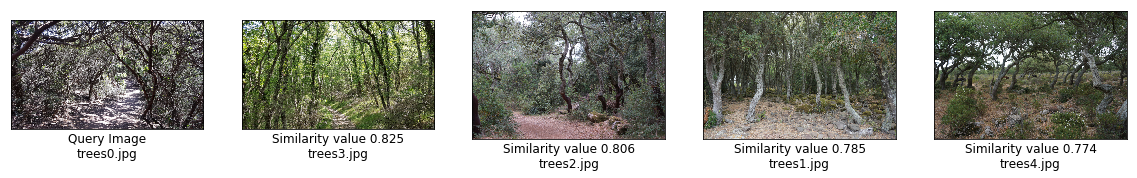

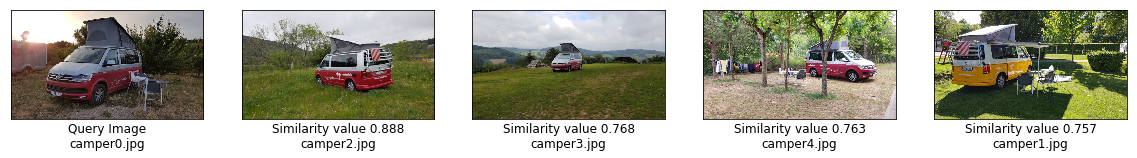

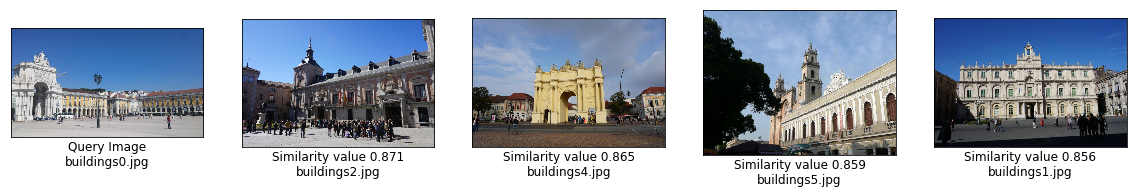

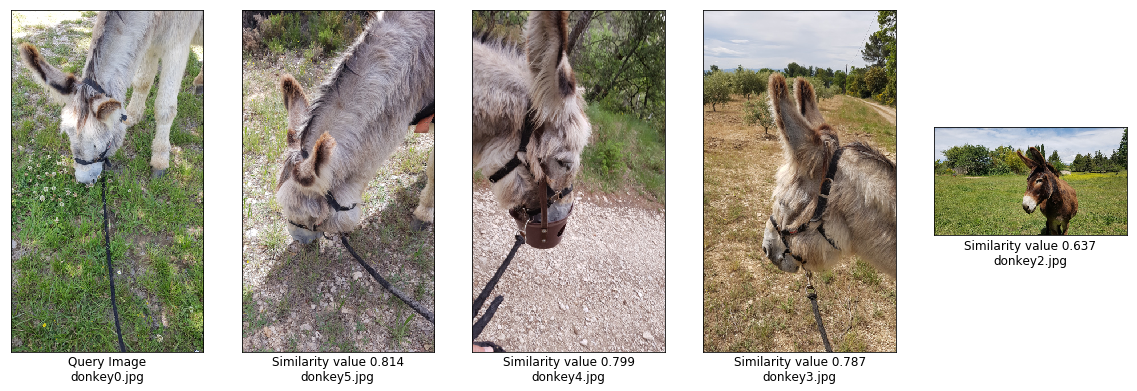

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# ingnore warning
import warnings
warnings.filterwarnings('ignore')
  
# take three examples from the provided image set and plot
inputImages = ["trees0.jpg", "camper0.jpg", "buildings0.jpg", "donkey0.jpg"]

numCol = 5
numRow = 1

def setAxes(ax, image, query = False, **kwargs):
    value = kwargs.get("value", None)
    
    if query:
        ax.set_xlabel("Query Image\n{0}".format(image), fontsize = 12)
    else:
        ax.set_xlabel("Similarity value {1:1.3f}\n{0}".format( image,  value), fontsize = 12)
        
    ax.set_xticks([])
    ax.set_yticks([])
    
def getSimilarImages(image, simNames, simVals):
    if image in set(simNames.index):
        imgs = list(simNames.loc[image, :])
        vals = list(simVals.loc[image, :])
        
        if image in imgs:
            assert_almost_equal(max(vals), 1, decimal = 5)
            imgs.remove(image)
            vals.remove(max(vals))
            
        return imgs, vals
    else:
        print("'{}' Unknown image".format(image))
        
def plotSimilarImages(image, simiarNames, similarValues):
    simImages, simValues = getSimilarImages(image, similarNames, similarValues)
    fig = plt.figure(figsize=(20, 30))
    
    # now plot the  most simliar images
    for j in range(0, numCol*numRow):
        ax = []
        if j == 0:
            img = Image.open(os.path.join(inputDir, image))
            ax = fig.add_subplot(numRow, numCol, 1)
            setAxes(ax, image, query = True)
        else:
            img = Image.open(os.path.join(inputDir, simImages[j-1]))
            ax.append(fig.add_subplot(numRow, numCol, j+1))
            setAxes(ax[-1], simImages[j-1], value = simValues[j-1])
        img = img.convert('RGB')
        plt.imshow(img)
        img.close()
        
    plt.show()
        
for image in inputImages:
    plotSimilarImages(image, similarNames, similarValues)